In [57]:
from pathlib import Path
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

sample_rate, audio = wavfile.read('000_Death_of_a_Spaceman.wav')
print(f'sample_rate: {sample_rate}')
print(f'audio:\n{audio}')

sample_rate: 22050
audio:
[0 0 0 ... 0 0 0]


In [58]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 7

# audio = audio[:sample_rate * 2]
audio = np.abs(audio - audio.max() / 2) - .5
audio = audio / audio.max()
audio = audio[::200]
sample_rate /= 10
audio = pd.Series(audio, name='audio')
audio.index = 100 * audio.index / sample_rate
audio.index.name = 'Time (ms)'

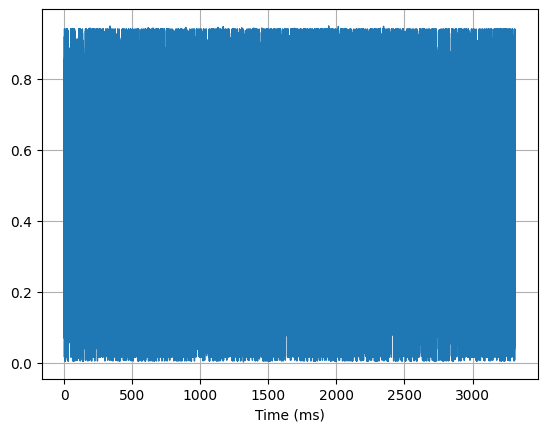

In [59]:
ax = audio.plot(linewidth= 1, grid='on')

In [60]:
np.savetxt('utama.txt',audio,fmt='%.4f')

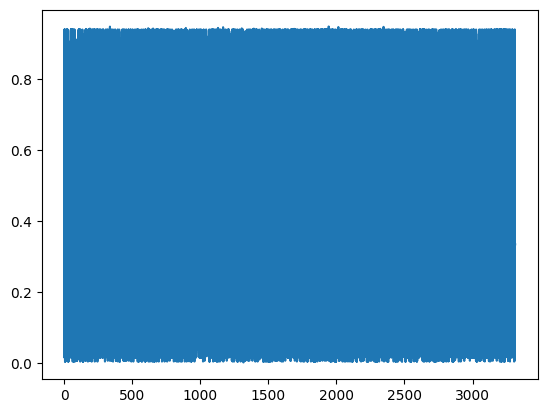

In [61]:
plt.plot(audio)

In [62]:
data1 = []

for duration in audio:
    temp = int(duration * 10)
    if temp == 3:
        data1.append(0)
    elif temp != 3:
        data1.append(1)

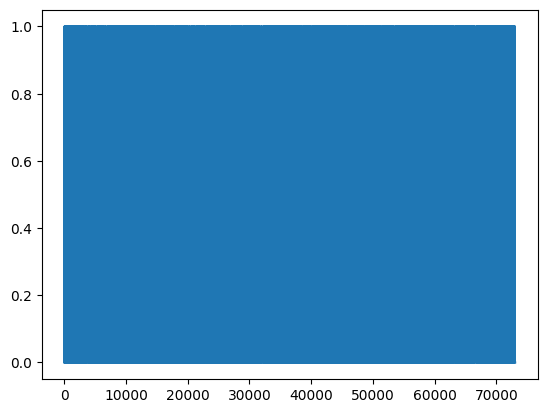

In [63]:
plt.plot(data1)
np.savetxt('utama1.txt',data1,fmt='%d')

In [64]:
data2 = []

previous = None

for i in range(len(data1)):
    if data1[i] == 1:
        data2.append(1)
    
    if data1[i] == 0:
        if i != 0:
            if data1[i-1] == 1 and data1[i+1] == 1:
                data2.append(1)
            else:
                data2.append(0) 


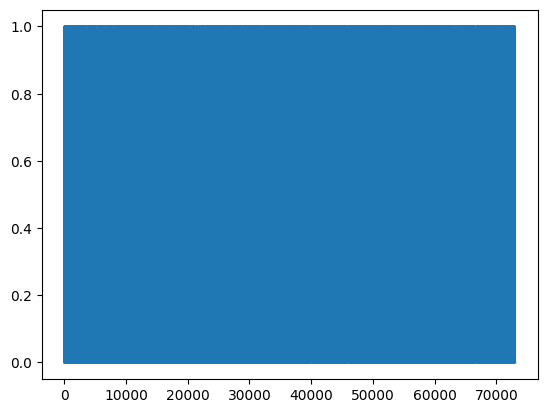

In [65]:
plt.plot(data2)

In [66]:
data3 = []

previous = None

for duration in data2:
    
    if duration == previous:
        if duration == 0:
            data3[-1] -= 1
        elif duration == 1:
            data3[-1] += 1
    elif duration != previous:
        if duration == 0:
            data3.append(-1)
        elif duration == 1:
            data3.append(1)
    
    previous = duration

np.savetxt('utama3.txt',data3,fmt='%d')

In [67]:
morse_code = ""

for morse in data3:
    if morse > 0:
        if morse < 20:
            morse_code += '.'
        elif morse > 20:
            morse_code += '-'
    elif morse < 0:
        if abs(morse) > 150:
            morse_code += '/'
        elif abs(morse) > 50:
            morse_code += ' '

print(morse_code)

    

-.-.-/- .... .. .../. -... --- --- -.-/.. .../..-. --- .-./- .... ./..- ... ./--- ..-./.- -. -.-- --- -. ./.- -. -.-- .-- .... . .-. ./.- -/-. ---/-.-. --- ... -/.- -. -../.-- .. - ..../.- .-.. -- --- ... -/-. ---/.-. . ... - .-. .. -.-. - .. --- -. .../.-- .... .- - ... --- . ...- . .-. .-.-.-/-.-- --- ..-/-- .- -.--/-.-. --- .--. -.--/.. - --..--/--. .. ...- ./.. -/.- .-- .- -.--/--- .-./.-. . -....- ..- ... ./.. -/..- -. -.. . .-./- .... ./- . .-. -- .../--- ..-./- .... ./.--. .-. --- .--- . -.-. -/--. ..- - . -. -... . .-. --./.-.. .. -.-. . -. ... ./.. -. -.-. .-.. ..- -.. . -../.-- .. - ..../- .... .. .../. -... --- --- -.-/--- .-./--- -. .-.. .. -. ./.- -/.-- .-- .-- .-.-.- --. ..- - . -. -... . .-. --. .-.-.- --- .-. --./-...- -.. . .- - ..../--- ..-./.-/... .--. .- -.-. . -- .- -./-... -.--/.-- .- .-.. - . .-./-- .-.-.-/-- .. .-.. .-.. . .-. --..--/.--- .-. .-.-.-/-...- --- .-.. -../-.. --- -. . --. .- .-../.-- .- .../-.. -.-- .. -. --. .-.-.-/- .... . -.--/.... .- -../.- .-..

In [68]:
data_morse = {
    '.-': 'A', '-...': 'B', '-.-.': 'C', '-..': 'D', '.': 'E',
    '..-.': 'F', '--.': 'G', '....': 'H', '..': 'I', '.---': 'J',
    '-.-': 'K', '.-..': 'L', '--': 'M', '-.': 'N', '---': 'O',
    '.--.': 'P', '--.-': 'Q', '.-.': 'R', '...': 'S', '-': 'T',
    '..-': 'U', '...-': 'V', '.--': 'W', '-..-': 'X', '-.--': 'Y',
    '--..': 'Z', '.----': '1', '..---': '2', '...--': '3', '....-': '4',
    '.....': '5', '-....': '6', '--...': '7', '---..': '8', '----.': '9',
    '-----': '0', '--..--': ',', '.-.-.-': '.', '..--..': '?',
    '-..-.': '/', '-....-': '-', '-.--.': '(', '-.--.-': ')'
}

decode_text = ""

words = morse_code.split('/')
for word in words:
    character = word.split(' ')
    decode_word = ''
    for char in character:
        if char in data_morse:
            decode_word += data_morse[char]
    decode_text += decode_word + ' '

print(decode_text)

 THIS EBOOK IS FOR THE USE OF ANYONE ANYWHERE AT NO COST AND WITH ALMOST NO RESTRICTIONS WHATSOEVER. YOU MAY COPY IT, GIVE IT AWAY OR RE-USE IT UNDER THE TERMS OF THE PROJECT GUTENBERG LICENSE INCLUDED WITH THIS EBOOK OR ONLINE AT WWW.GUTENBERG.ORG DEATH OF A SPACEMAN BY WALTER M. MILLER, JR. OLD DONEGAL WAS DYING. THEY HAD ALL KNOWN IT WAS COMING, AND THEY WATCHED IT COME--HIS HAGGARD WIFE, HIS DAUGHTER, AND NOW HIS GRANDSON, HOME ON EMERGENCY LEAVE FROM THE PRE-ASTRONAUTICS ACADEMY. OLD DONEGAL K 
